In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tools import plot_decision_regions

## ADALINE

* 가중치 생성: 샘플 feature의 수 + 1.
* 훈련: 경사 하강법 이용
  * 전체 샘플을 한번 순회할때마다 샘플 전체를 기반으로 한번 가중치 업데이트
  * loss function: SumSquaredError: $J(\boldsymbol{w})=\frac{1}{2}\sum_{i}(y^{(i)}-\phi(\boldsymbol{z}^{(i)}))^2$
    * 퍼셉트론과 달리 $\boldsymbol{z}$ 를 타겟과 비교한다.
    * $\phi$는 identity function
  * $\boldsymbol{w}=\boldsymbol{w} + \Delta \boldsymbol{w} =\boldsymbol{w} -\eta\nabla J(\boldsymbol{w}) = \boldsymbol{w} + \eta\sum_{i}(y^{(i)}-\phi(\boldsymbol{w\top x}^{(i)}))\boldsymbol{x}^{(i)}$
* prediction: 퍼셉트론과 마찬가지로 계단함수를 본뜬 임계함수를 이용해 출력 결정. $\pm1$

In [32]:
class ADALINE:
    """ADAptive LInear NEuron
    퍼셉트론의 개선판. 이진 분류를 수행하며 가중치 학습에 경사하강법을 이용한다.
    """
    def __init__(self, num_features, learning_rate):
        # 가중치 생성
        self.w = np.random.RandomState(1).normal(0, 0.01, size=num_features+1)
        self.eta = learning_rate
        
    def calc_z(self, x):
        z = np.dot(x, self.w[1:]) + self.w[0]
        return z
    
    def activation(self, z):
        return z
    
    def threshold_function(self, z):
        return np.where(z >= 0, 1, -1)
    
    def __call__(self, x):
        z = self.activation(self.calc_z(x))
        return self.threshold_function(z)
    
#     def fit(self, x, y, epochs):
#         """주어지는 데이터 샘플을 이용해 가중치 훈련"""
#         def calc_cost_gradient_prediction(x, y):
#             """sample별 cost(squared error), gradient, 예측값 계산"""
#             z = self.calc_z(x)
#             error = y - self.activation(z)
#             cost = (error ** 2) / 2.
#             gradient = -error * np.concatenate([(1.,), x])
#             prediction = self.threshold_function(z)
#             return cost, gradient, prediction
        
#         self._loss_history = []
#         self._accuracy_history = []
            
#         for epoch in range(epochs):
#             loss = 0.
#             gradient_sum = 0.
#             correct_pred = []
#             for sample, target in zip(x, y):
#                 cost, gradient, prediction = calc_cost_gradient_prediction(sample, target)
#                 loss += cost  # sum squared error 계산
#                 gradient_sum += gradient  # batch gradient descent를 적용하기위해 그래디언트 누적
#                 correct_pred.append(int(prediction == target))  # 정확도 계산
            
#             accuracy = sum(correct_pred)/len(correct_pred)
#             self._loss_history.append(loss)
#             self._accuracy_history.append(accuracy)
            
#             # 가중치 갱신
#             d_w = -self.eta * gradient_sum
#             self.w += d_w
            
#             print(f'{epoch} epoch - loss: {loss:.4f}, acc: {accuracy:.4f}')

    def fit(self, x, y, epochs):
        """주어지는 데이터 샘플을 이용해 가중치 훈련"""
        def calc_cost_gradient_prediction(x, y):
            """전체 샘플의 cost(squared error), gradient, 예측값 계산"""
            z = self.calc_z(x)
            error = y - self.activation(z)
            cost = (error ** 2) / 2.
            gradient = np.dot(-error, np.concatenate([np.ones((x.shape[0], 1)), x], axis=-1))
            prediction = self.threshold_function(z)
            return cost, gradient, prediction
        
        self._loss_history = []
        self._accuracy_history = []
        
        # 행렬곱을 통해 전체 데이터를 한번에 계산
        for epoch in range(epochs):
            loss = 0.
            gradient_sum = 0.
            
            cost, gradient, prediction = calc_cost_gradient_prediction(x, y)
            loss = cost.sum()  # sum squared error 계산
            accuracy = np.sum(prediction==y)/y.shape[0]
            
            self._loss_history.append(loss)
            self._accuracy_history.append(accuracy)
            
            # 가중치 갱신
            d_w = -self.eta * gradient
            self.w += d_w
            
            print(f'{epoch} epoch - loss: {loss:.4f}, acc: {accuracy:.4f}')

### 학습

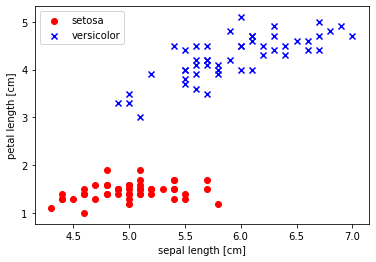

In [33]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

#### 적당한 학습률

0 epoch - loss: 51.0812, acc: 0.5000
1 epoch - loss: 46.0987, acc: 0.5000
2 epoch - loss: 43.1835, acc: 0.5000
3 epoch - loss: 40.5384, acc: 0.5000
4 epoch - loss: 38.0689, acc: 0.6700
5 epoch - loss: 35.7601, acc: 0.9400
6 epoch - loss: 33.6013, acc: 0.9800
7 epoch - loss: 31.5829, acc: 0.9900
8 epoch - loss: 29.6957, acc: 1.0000
9 epoch - loss: 27.9311, acc: 1.0000


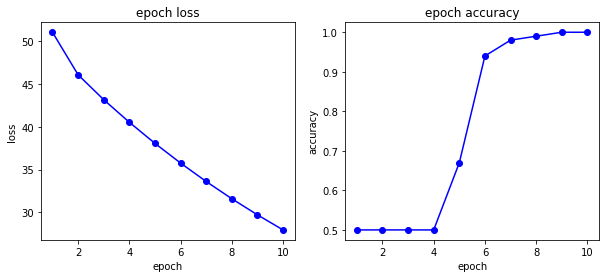

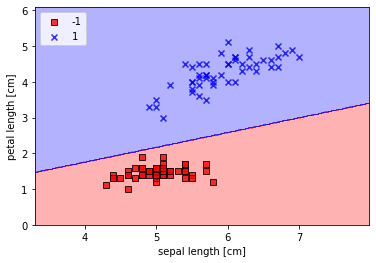

In [107]:
adaline = ADALINE(2, 0.0003)
adaline.fit(X, y, 10)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax_0, ax_1 = ax[:2]
ax_0.plot(range(1, 11), adaline._loss_history, 'b', marker='o')
ax_0.set_title('epoch loss')
ax_0.set_xlabel('epoch')
ax_0.set_ylabel('loss')

ax_1.plot(range(1, 11), adaline._accuracy_history, 'b', marker='o')
ax_1.set_title('epoch accuracy')
ax_1.set_xlabel('epoch')
ax_1.set_ylabel('accuracy')
plt.show()

plot_decision_regions(X, y, adaline, x_label='sepal length [cm]', y_label='petal length [cm]')

#### 너무 높은 학습률: 가중치가 너무 크게 변화하며 발산함 (큰 가중치 변화 -> 에러 증가 -> 더욱 큰 가중치 변화 -> 에러 증가 -> ... 악순환)

0 epoch - loss: 51.0812, acc: 0.5000
1 epoch - loss: 3212.0017, acc: 0.5000
2 epoch - loss: 5006791.2872, acc: 0.5000
3 epoch - loss: 7811818375.7816, acc: 0.5000
4 epoch - loss: 12188352557082.2773, acc: 0.5000
5 epoch - loss: 19016819254863856.0000, acc: 0.5000
6 epoch - loss: 29670902025401176064.0000, acc: 0.5000
7 epoch - loss: 46293884124485681938432.0000, acc: 0.5000
8 epoch - loss: 72229813084097873331617792.0000, acc: 0.5000
9 epoch - loss: 112696223201636094833145675776.0000, acc: 0.5000


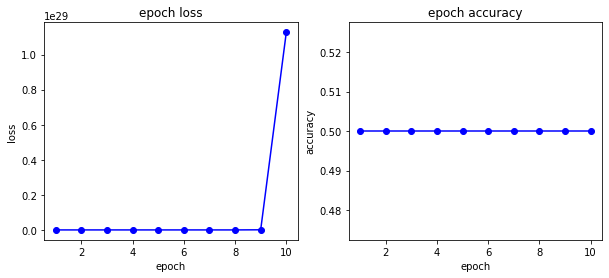

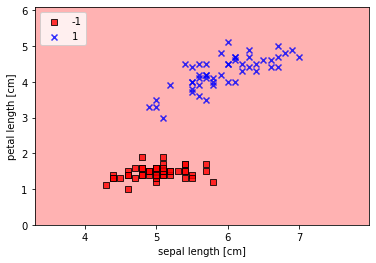

In [35]:
adaline = ADALINE(2, 0.01)
adaline.fit(X, y, 10)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax_0, ax_1 = ax[:2]
ax_0.plot(range(1, 11), adaline._loss_history, 'b', marker='o')
ax_0.set_title('epoch loss')
ax_0.set_xlabel('epoch')
ax_0.set_ylabel('loss')

ax_1.plot(range(1, 11), adaline._accuracy_history, 'b', marker='o')
ax_1.set_title('epoch accuracy')
ax_1.set_xlabel('epoch')
ax_1.set_ylabel('accuracy')
plt.show()

plot_decision_regions(X, y, adaline, x_label='sepal length [cm]', y_label='petal length [cm]')

#### 너무 낮은 학습률: 가중치 갱신이 미비하여 학습이 안됨

0 epoch - loss: 51.0812, acc: 0.5000
1 epoch - loss: 51.0812, acc: 0.5000
2 epoch - loss: 51.0812, acc: 0.5000
3 epoch - loss: 51.0811, acc: 0.5000
4 epoch - loss: 51.0811, acc: 0.5000
5 epoch - loss: 51.0811, acc: 0.5000
6 epoch - loss: 51.0811, acc: 0.5000
7 epoch - loss: 51.0810, acc: 0.5000
8 epoch - loss: 51.0810, acc: 0.5000
9 epoch - loss: 51.0810, acc: 0.5000


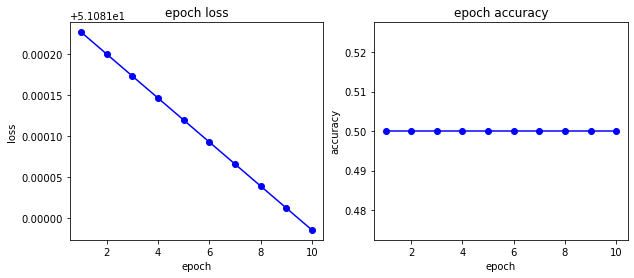

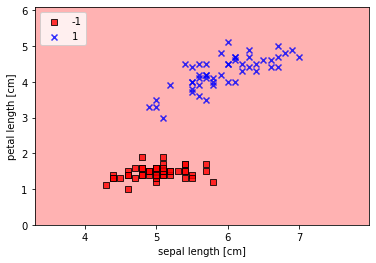

In [36]:
adaline = ADALINE(2, 0.000000001)
adaline.fit(X, y, 10)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax_0, ax_1 = ax[:2]
ax_0.plot(range(1, 11), adaline._loss_history, 'b', marker='o')
ax_0.set_title('epoch loss')
ax_0.set_xlabel('epoch')
ax_0.set_ylabel('loss')

ax_1.plot(range(1, 11), adaline._accuracy_history, 'b', marker='o')
ax_1.set_title('epoch accuracy')
ax_1.set_xlabel('epoch')
ax_1.set_ylabel('accuracy')
plt.show()

plot_decision_regions(X, y, adaline, x_label='sepal length [cm]', y_label='petal length [cm]')

## 데이터 전처리

In [39]:
print(f'mean: {X.mean(axis=0)} / std: {X.std(axis=0)} / max: {X.max(axis=0)} / min: {X.min(axis=0)}')

mean: [5.471 2.862] / std: [0.63848179 1.44130358] / max: [7.  5.1] / min: [4.3 1. ]


####  표준화 standardization

mean: [-1.51822999e-15 -3.86357613e-16] / std: [1. 1.] / max: [2.39474331 1.55276101] / min: [-1.8340382  -1.29188606]
0 epoch - loss: 50.9769, acc: 0.4200
1 epoch - loss: 34.4629, acc: 0.9600
2 epoch - loss: 23.5728, acc: 1.0000
3 epoch - loss: 16.3856, acc: 0.9700
4 epoch - loss: 11.6422, acc: 1.0000
5 epoch - loss: 8.5117, acc: 0.9900
6 epoch - loss: 6.4456, acc: 1.0000
7 epoch - loss: 5.0820, acc: 1.0000
8 epoch - loss: 4.1821, acc: 1.0000
9 epoch - loss: 3.5882, acc: 1.0000
[ 3.55132590e-16 -1.54334935e-01  9.72602910e-01]


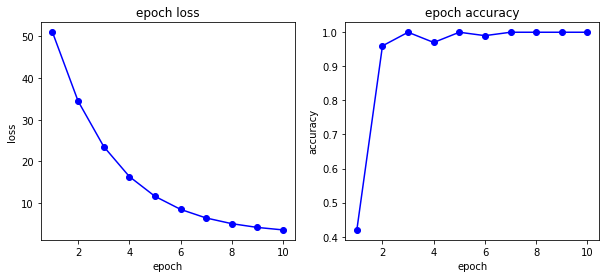

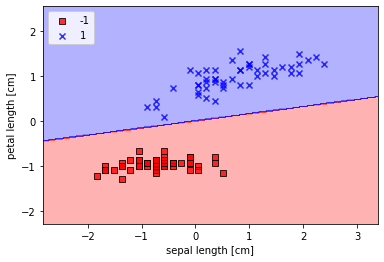

In [115]:
X_stand = (X - X.mean(axis=0))/X.std(axis=0)
print(f'mean: {X_stand.mean(axis=0)} / std: {X_stand.std(axis=0)} / max: {X_stand.max(axis=0)} / min: {X_stand.min(axis=0)}')

adaline = ADALINE(2, 0.01)
adaline.fit(X_stand, y, 10)
print(adaline.w)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax_0, ax_1 = ax[:2]
ax_0.plot(range(1, 11), adaline._loss_history, 'b', marker='o')
ax_0.set_title('epoch loss')
ax_0.set_xlabel('epoch')
ax_0.set_ylabel('loss')

ax_1.plot(range(1, 11), adaline._accuracy_history, 'b', marker='o')
ax_1.set_title('epoch accuracy')
ax_1.set_xlabel('epoch')
ax_1.set_ylabel('accuracy')
plt.show()

plot_decision_regions(X_stand, y, adaline, x_label='sepal length [cm]', y_label='petal length [cm]')

#### 하나의 특성값 범위가 매우 큰 경우

mean: [109.42    2.862] / std: [12.76963586  1.44130358] / max: [140.    5.1] / min: [86.  1.]
0 epoch - loss: 79.1124, acc: 0.5000
1 epoch - loss: 76.5868, acc: 0.5000
2 epoch - loss: 74.2792, acc: 0.5000
3 epoch - loss: 72.1709, acc: 0.5000
4 epoch - loss: 70.2443, acc: 0.5000
5 epoch - loss: 68.4837, acc: 0.5000
6 epoch - loss: 66.8746, acc: 0.5000
7 epoch - loss: 65.4038, acc: 0.5000
8 epoch - loss: 64.0593, acc: 0.5000
9 epoch - loss: 62.8300, acc: 0.5000
10 epoch - loss: 61.7060, acc: 0.5000
11 epoch - loss: 60.6780, acc: 0.5000
12 epoch - loss: 59.7377, acc: 0.5000
13 epoch - loss: 58.8774, acc: 0.5000
14 epoch - loss: 58.0903, acc: 0.5000
15 epoch - loss: 57.3698, acc: 0.5000
16 epoch - loss: 56.7103, acc: 0.5000
17 epoch - loss: 56.1063, acc: 0.5000
18 epoch - loss: 55.5531, acc: 0.5000
19 epoch - loss: 55.0462, acc: 0.5000
20 epoch - loss: 54.5817, acc: 0.5000
21 epoch - loss: 54.1557, acc: 0.5000
22 epoch - loss: 53.7650, acc: 0.5000
23 epoch - loss: 53.4065, acc: 0.5000
24 

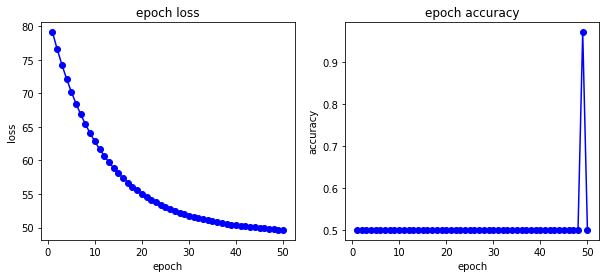

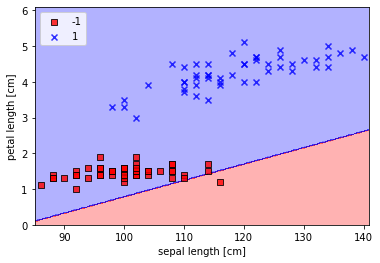

In [100]:
X_custom = X.copy()
X_custom[:, 0] = X_custom[:, 0] * 20
print(f'mean: {X_custom.mean(axis=0)} / std: {X_custom.std(axis=0)} / max: {X_custom.max(axis=0)} / min: {X_custom.min(axis=0)}')

epochs=50
adaline = ADALINE(2, 0.000001610)
adaline.fit(X_custom, y, epochs)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax_0, ax_1 = ax[:2]
ax_0.plot(range(1, epochs+1), adaline._loss_history, 'b', marker='o')
ax_0.set_title('epoch loss')
ax_0.set_xlabel('epoch')
ax_0.set_ylabel('loss')

ax_1.plot(range(1, epochs+1), adaline._accuracy_history, 'b', marker='o')
ax_1.set_title('epoch accuracy')
ax_1.set_xlabel('epoch')
ax_1.set_ylabel('accuracy')
plt.show()

plot_decision_regions(X_custom, y, adaline, x_label='sepal length [cm]', y_label='petal length [cm]')

---
### 배치 경사 하강법, 확률적 경사 하강법, 미니배치 경사 하강법 적용

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tools import plot_decision_regions

In [59]:
class ADALINE_GD:
    def __init__(self, num_features, batch_size=8):
        self.num_features = num_features
        self.batch_size = batch_size
        self.random_gen = np.random.RandomState(1)
        
    def calc_z(self, x):
        z = np.dot(x, self.w[1:]) + self.w[0]
        return z
    
    def activation(self, z):
        return z
    
    def threshold(self, activation):
        return np.where(activation >= 0., 1, -1)
    
    def calc_batch_cost(self, X, y):
        z = self.calc_z(X)
        error = y - z
        cost = np.square(error).sum() / 2
        pred = self.threshold(z)
        grad = -np.dot(error, np.hstack([np.ones((X.shape[0], 1)), X]))
        return cost, grad, pred
    
    def fit_batch(self, X, y, epochs, lr):
        self.w = self.random_gen.normal(0, 0.01, size=self.num_features+1)
        self._loss_history = []
        
        for epoch in range(epochs):
            cost, grad, _ = self.calc_batch_cost(X, y)
            self._loss_history.append(cost)

            d_w = -lr * grad
            self.w += d_w

#             print(f'epoch {epoch+1} - cost: {cost:.4f}')
    
    def fit_minibatch(self, X, y, epochs, lr, lr_end_ratio=.5):
        self.w = self.random_gen.normal(0, 0.01, size=self.num_features+1)
        self._loss_history = []
        
        for epoch in range(epochs):
            epoch_lr = (1 - lr_end_ratio) * lr * (1 - epoch / epochs) + lr_end_ratio * lr
            rand_idx = self.random_gen.permutation(X.shape[0])
            X_ = X[rand_idx]
            y_ = y[rand_idx]
            epoch_cost = 0.
            for start_idx in range(0, X_.shape[0], self.batch_size):
                start, end = start_idx, start_idx + self.batch_size
                mini_X = X_[start: end]
                mini_y = y_[start: end]
                
                mini_cost, mini_grad, _ = self.calc_batch_cost(mini_X, mini_y)
                epoch_cost += mini_cost
                
                d_w = -epoch_lr * mini_grad
                self.w += d_w
            self._loss_history.append(epoch_cost)
#             print(f'epoch {epoch+1} - cost: {epoch_cost:.4f}')
            
    def fit_stochastic(self, X, y, epochs, lr, lr_end_ratio=.5):
        self.w = self.random_gen.normal(0, 0.01, size=self.num_features+1)
        self._loss_history = []
        
        for epoch in range(epochs):
            epoch_lr = (1 - lr_end_ratio) * lr * (1 - epoch / epochs) + lr_end_ratio * lr
            rand_idx = self.random_gen.permutation(X.shape[0])
            X_ = X[rand_idx]
            y_ = y[rand_idx]
            epoch_cost = 0.
            for sample, target in zip(X_, y_):
                z = self.calc_z(sample)
                error = target - z
                cost = np.square(error)
                grad = -np.dot(error, np.hstack([1., sample]))
                
                epoch_cost += cost
                
                d_w = -epoch_lr * grad
                self.w += d_w
            self._loss_history.append(epoch_cost)
#             print(f'epoch {epoch+1} - cost: {epoch_cost:.4f}')
            
    def __call__(self, x):
        z = self.calc_z(x)
        pred = self.threshold(self.activation(z))
        return pred

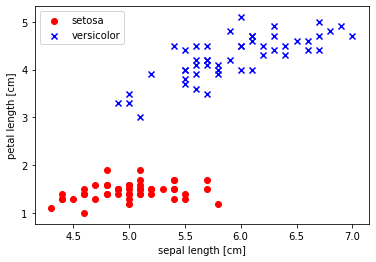

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

mean: [-1.51822999e-15 -3.86357613e-16] / std: [1. 1.] / max: [2.39474331 1.55276101] / min: [-1.8340382  -1.29188606]
fit_batch 




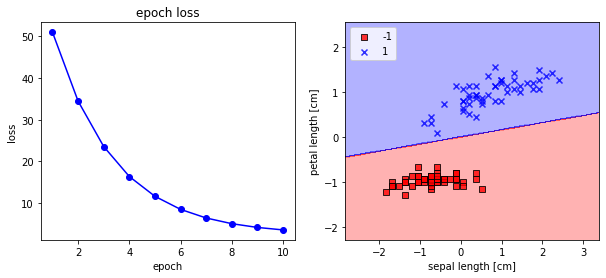

fit_minibatch 




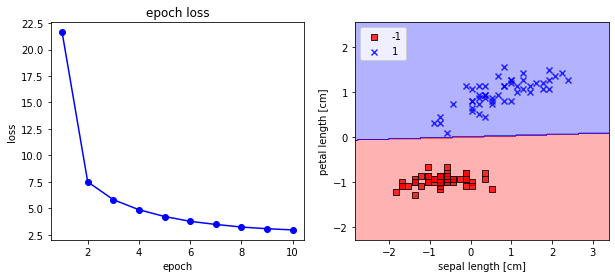

fit_stochastic 




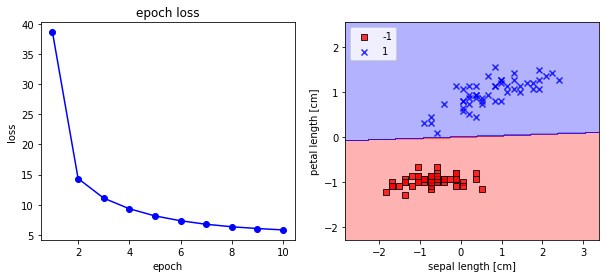

In [60]:
X_stand = (X - X.mean(axis=0))/X.std(axis=0)
print(f'mean: {X_stand.mean(axis=0)} / std: {X_stand.std(axis=0)} / max: {X_stand.max(axis=0)} / min: {X_stand.min(axis=0)}')

adaline = ADALINE_GD(2, 8)
epochs = 10
for fit_name in [fit_name for fit_name in dir(adaline) if fit_name.startswith('fit')]:
    print(fit_name, '\n\n')
    fit = getattr(adaline, fit_name)
    fit(X_stand, y, epochs, 0.01)
    
#     fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    plt.figure(figsize=(10, 4))    
    plt.subplot(121)
    plt.plot(range(1, epochs+1), adaline._loss_history, 'b', marker='o')
    plt.title('epoch loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    
    plt.subplot(122)
    plot_decision_regions(X_stand, y, adaline, x_label='sepal length [cm]', y_label='petal length [cm]')